In [1]:
import utils
import SOLVER
import Leap
#import jonas
import Dwave
import numpy as np
import pickle
import time
import matplotlib.pyplot as plt

data = pickle.load(open('Data_forfig2', 'rb'))

In [ ]:
num_instances=20

agent_list=[4,6,8,10,12,14,16,18,20,22,24,26,28,30]
timeout=np.full((len(agent_list), num_instances), 10)#np.array(classical_based_tte_list+20*[8000]).reshape(14,num_instances) 
run_time_Dwave=[]
Value_Dwave=[]
run_time_solver=[]
Value_solver=[]

run_time_Leap=[]
Value_Leap=[]
Value_Dwave=[]

leap_inf=([[[] for _ in range(1)] for _ in range(len(agent_list))]) # to store leap run time
rest_inf=([[[] for _ in range(1)] for _ in range(len(agent_list))]) # to store run time for splitting of colaitions  on classical hardware


Dwave_inf=([[[] for _ in range(20)] for _ in range(len(agent_list))])
rest_inf_dwave=([[[] for _ in range(20)] for _ in range(len(agent_list))])

for num,value_agent in enumerate(agent_list):
    print(num)
    print(value_agent)
    
    
    for idx in range(20):

        naeimeh_graph = data[value_agent][idx]
        edges = utils.transform(naeimeh_graph)
        print('idx',idx)
        ################################################ solver can be set to 'QBSOLVE' or 'SA' or 'Tabu'
        solver = 'Tabu'
        solver_start_time = time.time()
        coalitions1 = SOLVER.solve(value_agent, edges, timeout[num][idx])
        solver_end_time = time.time()
        value_solver = np.sum([utils.value(c,edges) for c in coalitions1])
        Value_solver.append(value_solver)
        run_time_solver.append(solver_end_time - solver_start_time)



        ################################################ Leap
        sampler = LeapHybridSampler()
        leap_start_time = time.time()
        coalitions3 = Leap.solve(value_agent, edges, timeout[num][idx],leap_inf,num,idx,rest_inf,sampler)
        leap_end_time = time.time()
        value_Leap = np.sum([utils.value(c,edges) for c in coalitions3])
        
       
        ############################################### Dwave
        sampler =DWaveCliqueSampler()
        coalitions3 = Dwave.solve(value_agent, edges, timeout[num][idx],Dwave_inf,num,idx,rest_inf_dwave,sampler)
        value_Dwave = np.sum([utils.value(c,edges) for c in coalitions3])
        Value_Dwave.append(value_Dwave)
       
        
        

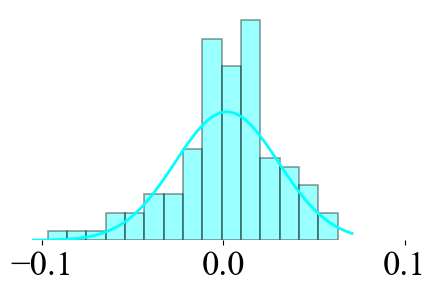

In [80]:
plt.figure(figsize=(5, 3))
plt.rcParams['font.family'] = 'times new roman'
average_data = np.mean([list(data[16][i].values()) for i in range(15)], axis=0)
plt.hist(average_data, bins='auto', edgecolor='black', linewidth=1.2, color='cyan', alpha=0.4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

mu, std = norm.fit(average_data)

# Plot the fitted Gaussian distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'cyan', linewidth=2)
plt.xticks([-0.1,0,0.1],size=25)
plt.yticks([],size=35)
ax_hist.yaxis.tick_right()

plt.savefig('hist.png', transparent=True)

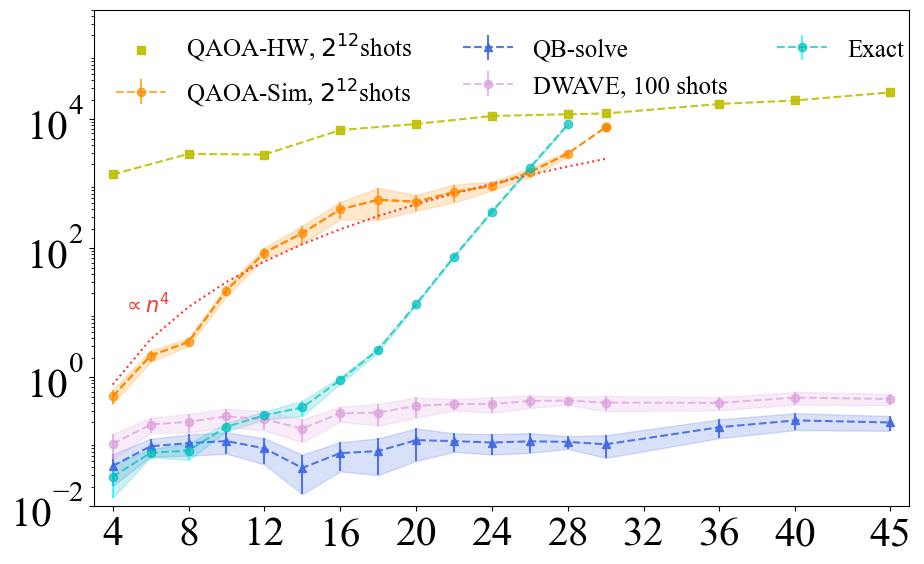

In [20]:

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import norm
from scipy.optimize import curve_fit
import networkx as nx 

plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'times new roman'
agent_list=[4,6,8,10,12,14,16,18,20,22,24,26,28]
agent_list_2=[4,6,8,10,12,14,16,18,20,22,24,26,28,30]
depth=1
n_values = [4, 6, 8, 10, 12, 14, 16, 18,20,22,24,26,28,30]
result1 = [3**n/1000 for n in [2, 4, 6, 8, 10, 12, 14, 16]]
result2 = [n**4*0.003 for n in n_values]





errorbar_color = 'cyan'

mean_QAOA=np.average(np.array(gate_based_tte_list).reshape(13,20),axis=1)
std_QAOA=np.std(np.array(gate_based_tte_list).reshape(13,20),axis=1)
mean_BF=np.average(np.array(bruteforce_tte_list).reshape(8,20),axis=1)
std_BF=np.std(np.array(bruteforce_tte_list).reshape(8,20),axis=1)
mean_qiskit=np.average(np.array(classical_based_tte_list).reshape(13,20),axis=1)
std_qiskit=np.std(np.array(classical_based_tte_list).reshape(13,20),axis=1)
mean_leap=np.average(np.array(leap_total_time).reshape(14,20),axis=1)
std_leap=np.std(leap_total_time,axis=1)



std_Dwave=list(np.std(Dwave_total_time,axis=1))+[0.09142041, 0.10813654, 0.09177511, 0.10032627]


plt.errorbar(agent_list,mean_QAOA,std_QAOA, fmt='--o',color='darkorange',ecolor='darkorange',alpha=0.7)
plt.errorbar(agent_list_2+[36,40,45],mean_gcsq[:17],std_gcsq[:17], fmt='--^',color='royalblue',ecolor='royalblue',alpha=0.9)
plt.errorbar(agent_list_2+[36,40,45],mean_Dwave[:17],std_Dwave[:17], fmt='--o',color='plum',ecolor='plum',alpha=0.7)

plt.errorbar(agent_list,mean_qiskit,std_qiskit, fmt='--o',color='c',ecolor=errorbar_color,alpha=0.7)
plt.legend(('QAOA-HW, $2^{12}$shots','QAOA-Sim, $2^{12}$shots','QB-solve','DWAVE, 100 shots','Exact'),frameon=False, ncol=3,loc='upper left',fontsize=18)
plt.plot([4,8,12,16,20,24,28,30,36,40,45],[1390,2896.9759999999997,2826.223000000001,6784.981000000002,8423.906999999994,11215.964999999998,11931.019000000002,12259.445999999996,17217.51500000001,19500,26012],'--',color='y',alpha=0.9)



plt.scatter(30,7500,color='darkorange')
plt.plot(agent_list_2,list(mean_QAOA)+[7500],'--',color='darkorange')
plt.fill_between(
    agent_list_2+[36,40,45],
    np.array(mean_gcsq[:17]) - np.array(std_gcsq[:17]),
    np.array(mean_gcsq[:17]) + np.array(std_gcsq[:17]),
    color='royalblue',
    alpha=0.2,  # Adjust the transparency of the shaded region
)

plt.fill_between(
    agent_list,
    mean_QAOA - std_QAOA,
    mean_QAOA + std_QAOA,
    color='darkorange',
    alpha=0.2,  # Adjust the transparency of the shaded region
)

 

plt.fill_between(
    agent_list,
    mean_qiskit - std_qiskit,
    mean_qiskit + std_qiskit,
    color='c',
    alpha=0.2,  # Adjust the transparency of the shaded region
)


plt.fill_between(
    agent_list_2+[36,40,45],
    np.array(mean_Dwave[:17]) - np.array(std_Dwave[:17]),
    np.array(mean_Dwave[:17]) + np.array(std_Dwave[:17]),
    color='plum',
    alpha=0.2,  # Adjust the transparency of the shaded region
)




plt.plot(n_values,result2,color='red',linestyle='dotted',alpha=0.8)
annotation_point = (9, 15)
plt.text(7, 10, '$ \propto n^4$', color='red', fontsize=15, ha='right',alpha=0.8)
plt.ylim(1e-1, 5*1e5)
plt.xlim(3,46)

plt.xticks([4,8,12,16,20,24,28,32,36,40,45],fontsize=30)
plt.yticks(fontsize=30)
plt.yscale('log')
plt.gca().set_yticks([1e-2,1,1e2,1e4])
plt.tight_layout(pad=2.0)
plt.savefig('RUNTIME.pdf', dpi=300,transparent=True)



# Random samples

In [ ]:
import pickle
data_dict = {
    'Jonas_run_time': run_time_jonas,
    'Gcsq_run_time': run_time_gcsq,
    'Jonas_value': Value_jonas,
    'Gcsq_value': Value_gcsq
    
}
with open('data_rondom_400prosumers_100_samples_0,5scale_2_second_run.pkl', 'wb') as pickle_file:
    pickle.dump(data_dict, pickle_file)

In [54]:
with open('data_rondom_400prosumers_100_samples_0,5scale.pkl', 'rb') as pickle_file:
    # Load the data from the file
    data_dict = pickle.load(pickle_file)

run_time_jonas= data_dict['Jonas_run_time']
Value_jonas= data_dict['Jonas_value']
Value_gcsq= data_dict['Gcsq_value']
run_time_gcsq= data_dict['Gcsq_run_time']

In [56]:
with open('data_rondom_400prosumers_100_samples_0,5scale_2_second_run.pkl', 'rb') as pickle_file:
    # Load the data from the file
    data_dict = pickle.load(pickle_file)

run_time_jonas= data_dict['Jonas_run_time']
Value_jonas= data_dict['Jonas_value']
Value_gcsq= data_dict['Gcsq_value']
run_time_gcsq= data_dict['Gcsq_run_time']

# Results for fig3 for random samples

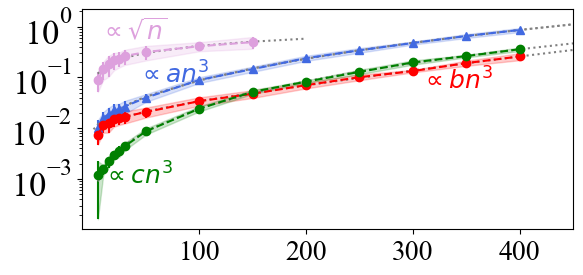

In [21]:
with open('data_forfig3.pkl', 'rb') as pickle_file:
    # Load the data from the file
    data_dict = pickle.load(pickle_file)

run_time_jonas= data_dict['Jonas_run_time']
Value_jonas= data_dict['Jonas_value']
Value_gcsq= data_dict['Gcsq_value']
run_time_gcsq= data_dict['Gcsq_run_time']

plt.figure(figsize=(6, 3))
errorbar_color = 'cyan'
node_list=[  5,10,15,20,25,30, 50, 100, 150, 200, 250, 300, 350, 400]
agent_list=node_list
mean_gcsq=np.average(np.array(run_time_gcsq).reshape(len(node_list),100)[:,:20],axis=1)
std_gcsq=np.std(np.array(run_time_gcsq).reshape(len(node_list),100)[:,:20],axis=1)

mean_tabu=np.array([0.00737698, 0.01156569, 0.01283154, 0.01551044, 0.01578435,
       0.01687952, 0.02089435, 0.03415717, 0.04779049, 0.07053974,
       0.10118273, 0.13333398, 0.19161886, 0.25891708])
std_tabu=np.array([0.00261504, 0.00340939, 0.00463398, 0.0047984 , 0.00415297,
       0.00452171, 0.00464352, 0.00643421, 0.00826589, 0.00971576,
       0.01296883, 0.00745232, 0.02231948, 0.04040858])


std_SA=np.array([0.00103508, 0.00036006, 0.00054589, 0.000547  , 0.00089153,
       0.00072402, 0.00121628, 0.00285039, 0.00474299, 0.00494215,
       0.01300267, 0.01892182, 0.01532894, 0.02854587])
mean_SA=np.array([0.00119692, 0.00154535, 0.00222445, 0.00300627, 0.00360327,
       0.00439745, 0.00871296, 0.02426648, 0.05217435, 0.08250333,
       0.12870082, 0.19744565, 0.26361705, 0.35940427])

plt.rcParams['font.family'] = 'times new roman'
mean_Dwave=np.array([0.08984331, 0.14564771, 0.18381374 ,0.22102009, 0.23385354, 0.26311356,
 0.31654712, 0.41114815 ,0.49642373])#np.average( Dwave_total_time,axis=1)
std_Dwave=np.std( Dwave_total_time,axis=1)
# mean_jonas=np.average(np.array(run_time_jonas).reshape(len(node_list),100),axis=1)
# std_jonas=np.std(np.array(run_time_jonas).reshape(len(node_list),100),axis=1)
plt.errorbar(agent_list,mean_gcsq,std_gcsq, fmt='--^',color='royalblue',ecolor='royalblue',alpha=1)
plt.errorbar(agent_list[:9],mean_Dwave[:9],std_Dwave[:9], fmt='--o',color='plum',ecolor='plum',alpha=1)
plt.errorbar(agent_list,mean_tabu,std_tabu, fmt='--o',color='red',ecolor='red',alpha=1)
plt.errorbar(agent_list,mean_SA,std_SA, fmt='--o',color='green',ecolor='green',alpha=1)
#plt.legend(('QUBO','DWAVE','$ \propto n^3$'),frameon=False, ncol=1,loc='lower left',fontsize=40)
y=mean_gcsq
x=node_list
n=np.array([  5,10,15,20,25,30, 50, 100, 150, 200, 250, 300, 350, 400,450,500])
#plt.scatter(x, y, label='Data Points')
coefficients = np.polyfit(x, y, 3)
fit_line = np.poly1d(coefficients)
# Plot the fitted line
plt.plot(n, fit_line(n),':', color='gray',alpha=0.8)
n=np.array([  5,10,15,20,25,30, 50, 100, 150,200])
plt.plot(n,0.03877830100363636*n**0.5+0.031749075000944106,':', color='gray')
# c: 0.03877633002929387
# d: 0.03170633204105558

a=3.755746029971915e-09
b=-6.552487575570535e-07
c=0.0002882773034261068
d=0.008303165859402311

n=np.array([  5,10,15,20,25,30, 50, 100, 150, 200, 250, 300, 350, 400,450])
plt.plot(n,a*n**3+b*n**2+c*n+d,':', color='gray')
a=2.0136987259618065e-09
b=1.1650854913712127e-06
c=0.00010759069317010986
d=0.00033314037034198164
n=np.array([  5,10,15,20,25,30, 50, 100, 150, 200, 250, 300, 350, 400,450])
plt.plot(n,a*n**3+b*n**2+c*n+d,':', color='gray')
a=5.451581826709299e-09
b=1.749236886166008e-06
c=0.0005571628806213282
d=0.008986672336693159
n=np.array([ 1 ,5,10,15,20,25,30, 50, 100, 150, 200, 250, 300, 350, 400,450])
plt.plot(n,a*n**3+b*n**2+c*n+d,':', color='gray')

plt.text(110, 0.08, '$ \propto a n^3$', color='royalblue', fontsize=18, ha='right',alpha=1)
plt.text(375, 0.06, '$ \propto b n^3$', color='red', fontsize=18, ha='right',alpha=1)
plt.text(75, 0.0008, '$ \propto c n^3$', color='green', fontsize=18, ha='right',alpha=1)

plt.text(70, 0.59, '$ \propto \sqrt{n}$', color='plum', fontsize=18, ha='right',alpha=1)
plt.fill_between(
    agent_list,
    mean_gcsq - std_gcsq,
    mean_gcsq + std_gcsq,
    color='royalblue',
    alpha=0.2,  # Adjust the transparency of the shaded region
)


plt.fill_between(
    agent_list[:9],
    mean_Dwave[:9] - std_Dwave[:9],
    mean_Dwave [:9]+ std_Dwave[:9],
    color='plum',
    alpha=0.2,  # Adjust the transparency of the shaded region
)

plt.fill_between(
    agent_list,
    mean_tabu - std_tabu,
    mean_tabu+ std_tabu,
    color='red',
    alpha=0.2,  # Adjust the transparency of the shaded region
)

plt.fill_between(
    agent_list,
    mean_SA - std_SA,
    mean_SA+ std_SA,
    color='green',
    alpha=0.2,  # Adjust the transparency of the shaded region
)

plt.yticks(size=25)
#plt.yscale('log')

plt.tight_layout(pad=2.0)
#plt.yticks([1e-4,1e-2,1e-1])
#plt.ylim([])
plt.xlim([-10,450])
plt.xticks([100,200,300,400],size=20)

plt.yscale('log')
plt.savefig('Qubo_large_log_time.pdf', transparent=True)  


In [35]:
import pickle
with open('data_random_Dwave_150_200reads_scale_2.pkl', 'rb') as pickle_file:
    data_dict = pickle.load(pickle_file)
    # Load the data from the file
    Dwave_rest_inf=data_dict['Dwave_rest_inf']
    Dwave_inf= data_dict['Dwave_inf']
    Value_Dwave_2= data_dict['Dwave_value']
with open('data_random_Dwave_150_200reads.pkl', 'rb') as pickle_file:
    data_dict = pickle.load(pickle_file)
    # Load the data from the file
    Dwave_rest_inf=data_dict['Dwave_rest_inf']
    Dwave_inf= data_dict['Dwave_inf']
    Value_Dwave_1= data_dict['Dwave_value'] 

array([5.79287939e+00, 9.82322468e+01, 2.89592664e+02, 8.65697757e+02,
       1.61589611e+03, 2.51245082e+03, 3.51445480e+03, 4.64262298e+03,
       5.85556704e+03, 7.12733570e+03])

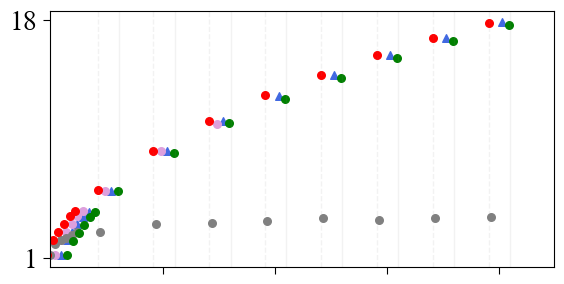

In [12]:
plt.rcParams['font.family'] = 'times new roman'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.major.size'] = 5
with open('data_random_Dwave_150_200reads_scale_2.pkl', 'rb') as pickle_file:
    data_dict = pickle.load(pickle_file)
    # Load the data from the file
    Dwave_rest_inf=data_dict['Dwave_rest_inf']
    Dwave_inf= data_dict['Dwave_inf']
    Value_Dwave_2= data_dict['Dwave_value']

with open('data_random_Dwave_150_200reads.pkl', 'rb') as pickle_file:
    data_dict = pickle.load(pickle_file)
    # Load the data from the file
    Dwave_rest_inf=data_dict['Dwave_rest_inf']
    Dwave_inf= data_dict['Dwave_inf']
    Value_Dwave_1= data_dict['Dwave_value']  


with open('data_rondom_400prosumers_100_samples_2scale.pkl', 'rb') as pickle_file:
    # Load the data from the file
    data_dict = pickle.load(pickle_file)

run_time_jonas= data_dict['Jonas_run_time']
Value_jonas= data_dict['Jonas_value']
Value_gcsq_2= data_dict['Gcsq_value']
run_time_gcsq_2= data_dict['Gcsq_run_time']   

with open('data_rondom_400prosumers_100_samples_0,5scale_2.pkl', 'rb') as pickle_file:
    # Load the data from the file
    data_dict = pickle.load(pickle_file)

run_time_jonas= data_dict['Jonas_run_time']
Value_jonas= data_dict['Jonas_value']
Value_gcsq_1= data_dict['Gcsq_value']
run_time_gcsq_1= data_dict['Gcsq_run_time']


      
fig, axes=plt.subplots(figsize=(6, 3.5))
plt.rcParams['font.family'] = 'times new roman'
#agent_list=[5,10,15,20,25,30, 50, 100, 150]
agent_list=np.array([  5,10,15,20,25,30, 50, 100, 150, 200, 250, 300, 350, 400])
agent_list_3=[  5,10,15,20,25,30, 50, 100, 150, 200, 250, 300]

Random=np.array([   5.79287939,   19.66676763,   34.32792001,   47.57462192,
         66.16197009,   83.91521866,  140.63126165,  342.68945126,
        520.9698457 ,  730.94307977, 958.64171399, 1112.26028403,
       1350.87128527, 1565.30491358])
Tabu=np.array([5.79287939e+00, 2.22864505e+01, 4.24886737e+01, 6.82866389e+01,
       9.86421890e+01, 1.29408628e+02, 2.90142263e+02, 8.63358132e+02,
       1.61682779e+03, 2.52094756e+03, 3.51137950e+03, 4.65115213e+03,
       5.83900888e+03, 7.10332735e+03])
SA=np.array([5.79287939e+00, 2.21940538e+01, 4.16213337e+01, 6.69105938e+01,
       9.69535649e+01, 1.28593321e+02, 2.89473213e+02, 8.48319188e+02,
       1.59226888e+03, 2.47166851e+03, 3.45691796e+03, 4.58789072e+03,
       5.77932893e+03, 7.05292806e+03])



width = 7



DW=np.array([ 1.15857588,  2.24330797,  2.83745756,  3.41670237,  3.9467121 ,
        4.31661036,  5.79021752,  8.64322874, 10.5552305 ])
plt.scatter(agent_list+3,np.average(np.array(Value_gcsq_2).reshape(len(agent_list),100)[:,:20],axis=1)/agent_list,color='royalblue',marker='^',s=30)
#plt.scatter(agent_list[:9]-2,np.average(np.array(Value_Dwave_2).reshape(len(agent_list[:9]),20),axis=1)/agent_list[:9],color='plum',marker='o',s=30)
plt.scatter(agent_list[:9]-2,DW,color='plum',marker='o',s=30)
plt.scatter(agent_list-width,Random/agent_list,color='gray',marker='o',s=30)
plt.scatter(agent_list-9,Tabu/agent_list,color='red',marker='o',s=30)
plt.scatter(agent_list+9,SA/agent_list,color='green',marker='o',s=30)

plt.xticks([5],size=20)
plt.yticks([1,18],size=20)


# Plot gray vertical lines to delineate ranges of x values
for i in range(6,len(agent_list)):
    plt.axvline(agent_list[i] - 9,linestyle = 'dashed', color='gray', linewidth=1,alpha=0.1)
    plt.axvline(agent_list[i] +10, color='gray', linewidth=1,alpha=0.1)
#axes.tick_params(width=1.5,labelleft=False,axis='x')
#axes.tick_params(width=1.5)
plt.tight_layout(pad=2.0)
#plt.yticks([1e-4,1e-2,1e-1])
plt.tick_params(axis='x', which='both', top=False, labelbottom=False)
plt.xticks(ticks=[100,200,300,400])
plt.xlim([-2,450])
plt.ylim()
plt.savefig('Qubo_large_value.pdf', transparent=True)  


# Remove the tick labels on the bottom x-axis




#plt.xscale('log')
plt.show()